## Last time we covered:
* ### Numpy arrays and numpy indexing
* ### Starting plots with matplotlib

## Today we will cover:
* ### Examples: Numpy indexing review and vectorizing code
* ### Examples: more types of plotting, axis and figure handles
* ### data input and output

## Numpy indexing/matplotlib examples

In [2]:
import numpy as np

### Lets say we have some data which represents individual points in 5 groups. We want to make a bar graph of the means over each group

#### First we make some data like this: 

In [3]:
data = np.random.rand(50)
groups = np.array(['A']*10+['B']*10+['C']*10+['D']*10+['E']*10) 

#### Note the brackets around each letter e.g. ['A']. The following code doesn't work, why?

In [4]:
groups_try = np.array('A'*10+'B'*10+'C'*10+'D'*10+'E'*10) #this doesn't work

In [8]:
groups_try

array('AAAAAAAAAABBBBBBBBBBCCCCCCCCCCDDDDDDDDDDEEEEEEEEEE', dtype='<U50')

#### You can see the difference between these with the shape property

In [9]:
print(groups.shape)
print(groups_try.shape)

(50,)
()


#### So we have 50 datapoints and their corresponding groups:

In [35]:
data

array([0.15695562, 0.88660066, 0.30550159, 0.23163472, 0.60457086,
       0.47826975, 0.39568274, 0.59126342, 0.78156324, 0.1140425 ,
       0.90895599, 0.63810058, 0.47233332, 0.04182674, 0.09306013,
       0.77877909, 0.00132412, 0.50853416, 0.19511657, 0.65795809,
       0.74880703, 0.02260119, 0.50484315, 0.25027597, 0.20094055,
       0.98549429, 0.60550168, 0.69074587, 0.87004494, 0.57317465,
       0.8308576 , 0.27524813, 0.24542447, 0.06365842, 0.45708618,
       0.90617434, 0.60351391, 0.6545142 , 0.75154986, 0.72336429,
       0.77610739, 0.36161592, 0.86930323, 0.74868178, 0.72920669,
       0.3789684 , 0.28795788, 0.94572424, 0.66610457, 0.23217328])

In [36]:
groups

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D',
       'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], dtype='<U1')

### Let's get the means of each group in an array using a loop:

In [11]:
uniqueGroups = np.unique(groups) #make an array with each group only once
group_index = np.arange(len(uniqueGroups)) #index to use when looping. 
storeMeans = np.zeros(len(uniqueGroups)) #array for storing the means
for n in group_index:
    storeMeans[n] = data[groups==uniqueGroups[n]].mean()

### Note: the enumerate function makes it wasy to do this without defining an index variable:

In [16]:
list(enumerate(uniqueGroups)) # this is a list of tuples, with the index and object in each tuple:

[(0, 'A'), (1, 'B'), (2, 'C'), (3, 'D'), (4, 'E')]

In [39]:
uniqueGroups = np.unique(groups)
storeMeans = np.zeros(len(uniqueGroups))
for n,g in enumerate(uniqueGroups):
    storeMeans[n] = data[groups==g].mean()

### Now let's make the plot. This time we will make figure and axes objects and use them to plot:


In [17]:
import matplotlib.pyplot as plt

### We will use the rcParams to set the default parameters. This will apply throughout the notebook so we don't need to set again.

In [34]:
plt.rcParams.update({'font.size':32,'figure.figsize':(10,10)})

### This lets you see all the parameters that can be set:

In [39]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

### Make a figure, add a subplot, make the barplot, and set the labels:

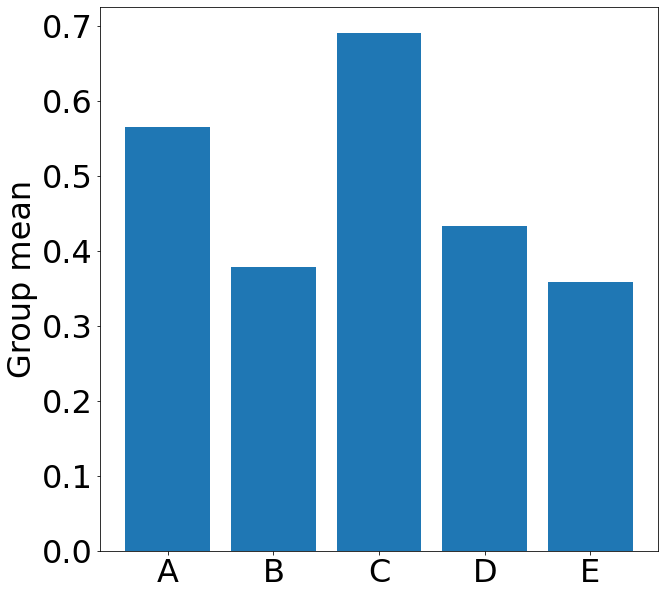

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(np.arange(len(storeMeans)),storeMeans)
ax.set_ylabel("Group mean",fontsize = 32)
ax.set_xticks(np.arange(len(storeMeans)))
ax.set_xticklabels(uniqueGroups);

### Another example. Let's make a scatter plot and color code the points by the distance to the x-axis:

### First lets make the data and compute distances:

In [41]:
x = np.random.rand(100)
y = np.random.rand(100)
dists = np.zeros(100)

for ii in np.arange(len(x)):
    dists[ii] = x[ii]*x[ii]+y[ii]*y[ii]
    dists[ii] = np.sqrt(dists[ii])

### Better, we can compute the distances without a loop, using the elementwise operations. This is referred to as "vectorizing" the code. Note that the built in numpy function sqrt automatically works on the vector in an elementwise way.

In [42]:
x = np.random.rand(100)
y = np.random.rand(100)
dists = np.sqrt(x*x+y*y)

### Now make the plot. Using the scatter command we can color code the points:

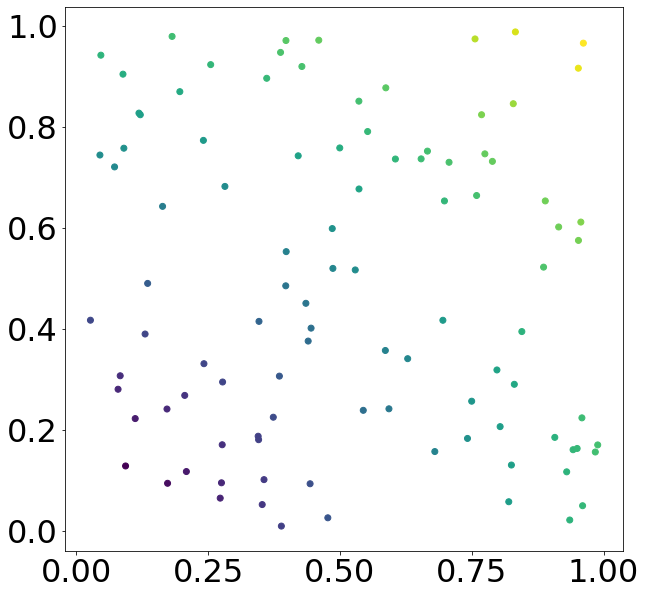

In [49]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y,c=dists)

### We can even add a 4th dimension of data encoded in the size of the points

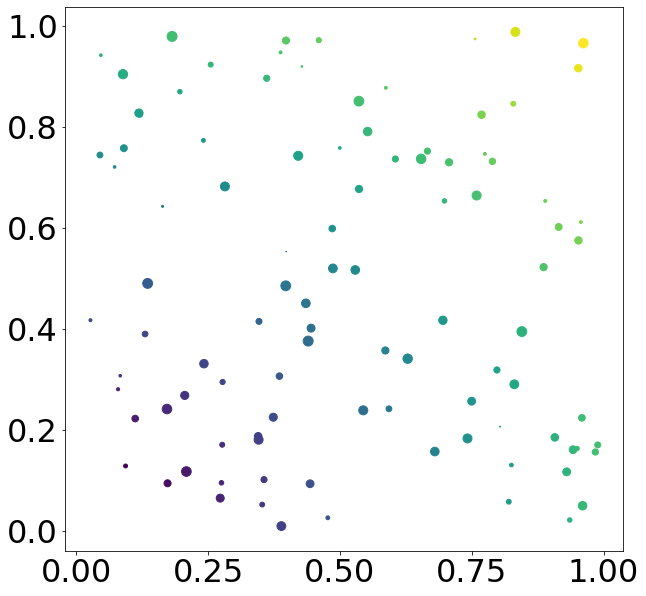

In [53]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x,y,c=dists,s = 100*np.random.rand(100));

## Inputting and outputting data:
* ### You may need to stop/start your analysis or your data may be too large to work with all at once.
* ### Data comes in a variety of formats (different instruments, collaborators, online sources etc) you need to be able to get it into python in order to work with it
* ### Other applications or people may require data formatted in particular ways

### The simplest way is to use the builtin numpy functions save and load to read from and write to disk:

### This writes the array x into the file x.npy. .npy is the format for storing a single numpy array.

In [54]:
x = np.random.rand(100)
y = np.random.rand(100)
np.save("x.npy",x)

### this file can be loaded with the np.load function. Note this funciton simply returns the array, which can be assigned to any variable

In [58]:
x_loaded = np.load("x.npy")
x_loaded-x # they are the same

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### If we want to save more than one array in the file, we can use savez and the npz format and specify the arrays to save and what they should be called: 

In [64]:
np.savez("xy.npz",x=x, y=y)

In [65]:
xy_loaded = np.load("xy.npz")
xy_loaded["y"]

array([0.53195257, 0.82461498, 0.98198838, 0.12687955, 0.01154246,
       0.87340931, 0.66006709, 0.99015455, 0.37864795, 0.39940096,
       0.92140632, 0.13254291, 0.7901828 , 0.96329004, 0.63549865,
       0.62358653, 0.36795679, 0.27666645, 0.60671751, 0.37158654,
       0.09560764, 0.06780099, 0.16632874, 0.11686128, 0.23555829,
       0.73999058, 0.43607399, 0.30391985, 0.54063237, 0.47762357,
       0.16527867, 0.38814203, 0.60071654, 0.34185465, 0.06469403,
       0.86652879, 0.10158582, 0.39636863, 0.19245471, 0.21905725,
       0.44280344, 0.87649057, 0.07493979, 0.6959226 , 0.64878125,
       0.50030443, 0.69286735, 0.84012263, 0.96510817, 0.92307311,
       0.19587663, 0.6310619 , 0.77880592, 0.92277197, 0.35230672,
       0.64952589, 0.92825313, 0.61394214, 0.61246942, 0.64650926,
       0.88635135, 0.14934782, 0.69947215, 0.9544156 , 0.40963825,
       0.09286051, 0.11106173, 0.61102516, 0.40550659, 0.2870538 ,
       0.02559242, 0.09170903, 0.19671699, 0.47623631, 0.68319

In [66]:
xy_loaded["y"] - y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### This is very convenient if you data is going to be read back into numpy. But if it isn't, you may want to save it as text:

In [70]:
x = np.random.random((100,10))
np.savetxt("x.txt",x)
np.savetxt("xcomma.txt",x,delimiter=",")

### The load text function can then be used to read this in. Or to read text generated from any other application. 

In [71]:
x_loaded = np.loadtxt("x.txt") 

### An issue with this is that numpy only uses arrays with a single datatype. So this won't work well if you have mixed data. Next week we will learn about the pandas library which can handle this issue. 

### You can also deal with it more manually by reading the data one line at a time.

In [74]:
f = open("x.txt","r") #open the file for reading

### You can then read the file one line at a time. 

In [77]:
for line in f:
    print(line)

### Note each line is read as a string regardless of what is in it. 

In [79]:
type(line)

str

### This will break up the line, but notice each element of the list is still a string. 

In [82]:
line_split = line.split()

In [83]:
line_split_numpy = np.array(line_split)

### Let's turn this into a numpy array. Note that the dtype is still string. 

In [85]:
line_split_numpy

array(['5.993591260631541129e-01', '7.737817434916767212e-01',
       '9.032695328292622561e-01', '1.891786483340602842e-01',
       '4.300903493326257987e-01', '5.404260819261660354e-01',
       '1.998558851436023076e-01', '1.679597924088308547e-01',
       '8.155938894244958437e-01', '8.684718482018948249e-01'],
      dtype='<U24')

### We can now use the numpy function astype to convert these strings to numbers.

In [88]:
line_split_numpy_floats = line_split_numpy.astype("float")

In [89]:
line_split_numpy_floats

array([0.59935913, 0.77378174, 0.90326953, 0.18917865, 0.43009035,
       0.54042608, 0.19985589, 0.16795979, 0.81559389, 0.86847185])

### We can also open a file and write to it one line at a time. Be careful, this will overwrite the file that is there. 

In [96]:
f_write = open("fileToWrite.txt","w") #open file for writing. 
f_write.write("Line 1\n")
f_write.write("Line 2\n")
f_write.write("Line 3\n")
f_write.close()

### If we use "a" flag instead of "w", the text will be appended at the bottom of the file:

In [98]:
f_append = open("fileToWrite.txt","a") 
f_append.write("Line 4\n")
f_append.write("Line 5\n")
f_append.close()